# Decision Tree: Assignment No.14

1.Company Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings 
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300

In [2]:
df = pd.read_csv('Company_Data.csv')
df

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [5]:
df.corr()

Sales  CompPrice    Income  Advertising  Population     Price  \
Sales        1.000000   0.064079  0.151951     0.269507    0.050471 -0.444951   
CompPrice    0.064079   1.000000 -0.080653    -0.024199   -0.094707  0.584848   
Income       0.151951  -0.080653  1.000000     0.058995   -0.007877 -0.056698   
Advertising  0.269507  -0.024199  0.058995     1.000000    0.265652  0.044537   
Population   0.050471  -0.094707 -0.007877     0.265652    1.000000 -0.012144   
Price       -0.444951   0.584848 -0.056698     0.044537   -0.012144  1.000000   
Age         -0.231815  -0.100239 -0.004670    -0.004557   -0.042663 -0.102177   
Education   -0.051955   0.025197 -0.056855    -0.033594   -0.106378  0.011747   

                  Age  Education  
Sales       -0.231815  -0.051955  
CompPrice   -0.100239   0.025197  
Income      -0.004670  -0.056855  
Advertising -0.004557  -0.033594  
Population  -0.042663  -0.106378  
Price       -0.102177   0.011747  
Age          1.000000   0.006488  
Education    0.006488   1.000000

In [6]:
df.groupby(['ShelveLoc','Urban','US']).count()

Sales  CompPrice  Income  Advertising  Population  Price  \
ShelveLoc Urban US                                                              
Bad       No    No      11         11      11           11          11     11   
                Yes     11         11      11           11          11     11   
          Yes   No      23         23      23           23          23     23   
                Yes     51         51      51           51          51     51   
Good      No    No       6          6       6            6           6      6   
                Yes     22         22      22           22          22     22   
          Yes   No      18         18      18           18          18     18   
                Yes     39         39      39           39          39     39   
Medium    No    No      29         29      29           29          29     29   
                Yes     39         39      39           39          39     39   
          Yes   No      55         55      55           55          55     55   
                Yes     96         96      96           96          96     96   

                     Age  Education  
ShelveLoc Urban US                   
Bad       No    No    11         11  
                Yes   11         11  
          Yes   No    23         23  
                Yes   51         51  
Good      No    No     6          6  
                Yes   22         22  
          Yes   No    18         18  
                Yes   39         39  
Medium    No    No    29         29  
                Yes   39         39  
          Yes   No    55         55  
                Yes   96         96

In [7]:
#Label Encoding
from sklearn import preprocessing

In [8]:
lb = preprocessing.LabelEncoder()
df['ShelveLoc'] = lb.fit_transform(df['ShelveLoc'])
df['Urban'] = lb.fit_transform(df['Urban'])
df['US'] = lb.fit_transform(df['US'])

In [9]:
df['ShelveLoc'] = df['ShelveLoc'].astype('category')
df['Urban'] = df['Urban'].astype('category')
df['US'] = df['US'].astype('category')

In [10]:
df.head(5)

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120         0   42   
1  11.22        111      48           16         260     83         1   65   
2  10.06        113      35           10         269     80         2   59   
3   7.40        117     100            4         466     97         2   55   
4   4.15        141      64            3         340    128         0   38   

   Education Urban US  
0         17     1  1  
1         10     1  1  
2         12     1  1  
3         14     1  1  
4         13     1  0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


In [12]:
sns.set_theme(style='darkgrid',palette='viridis')

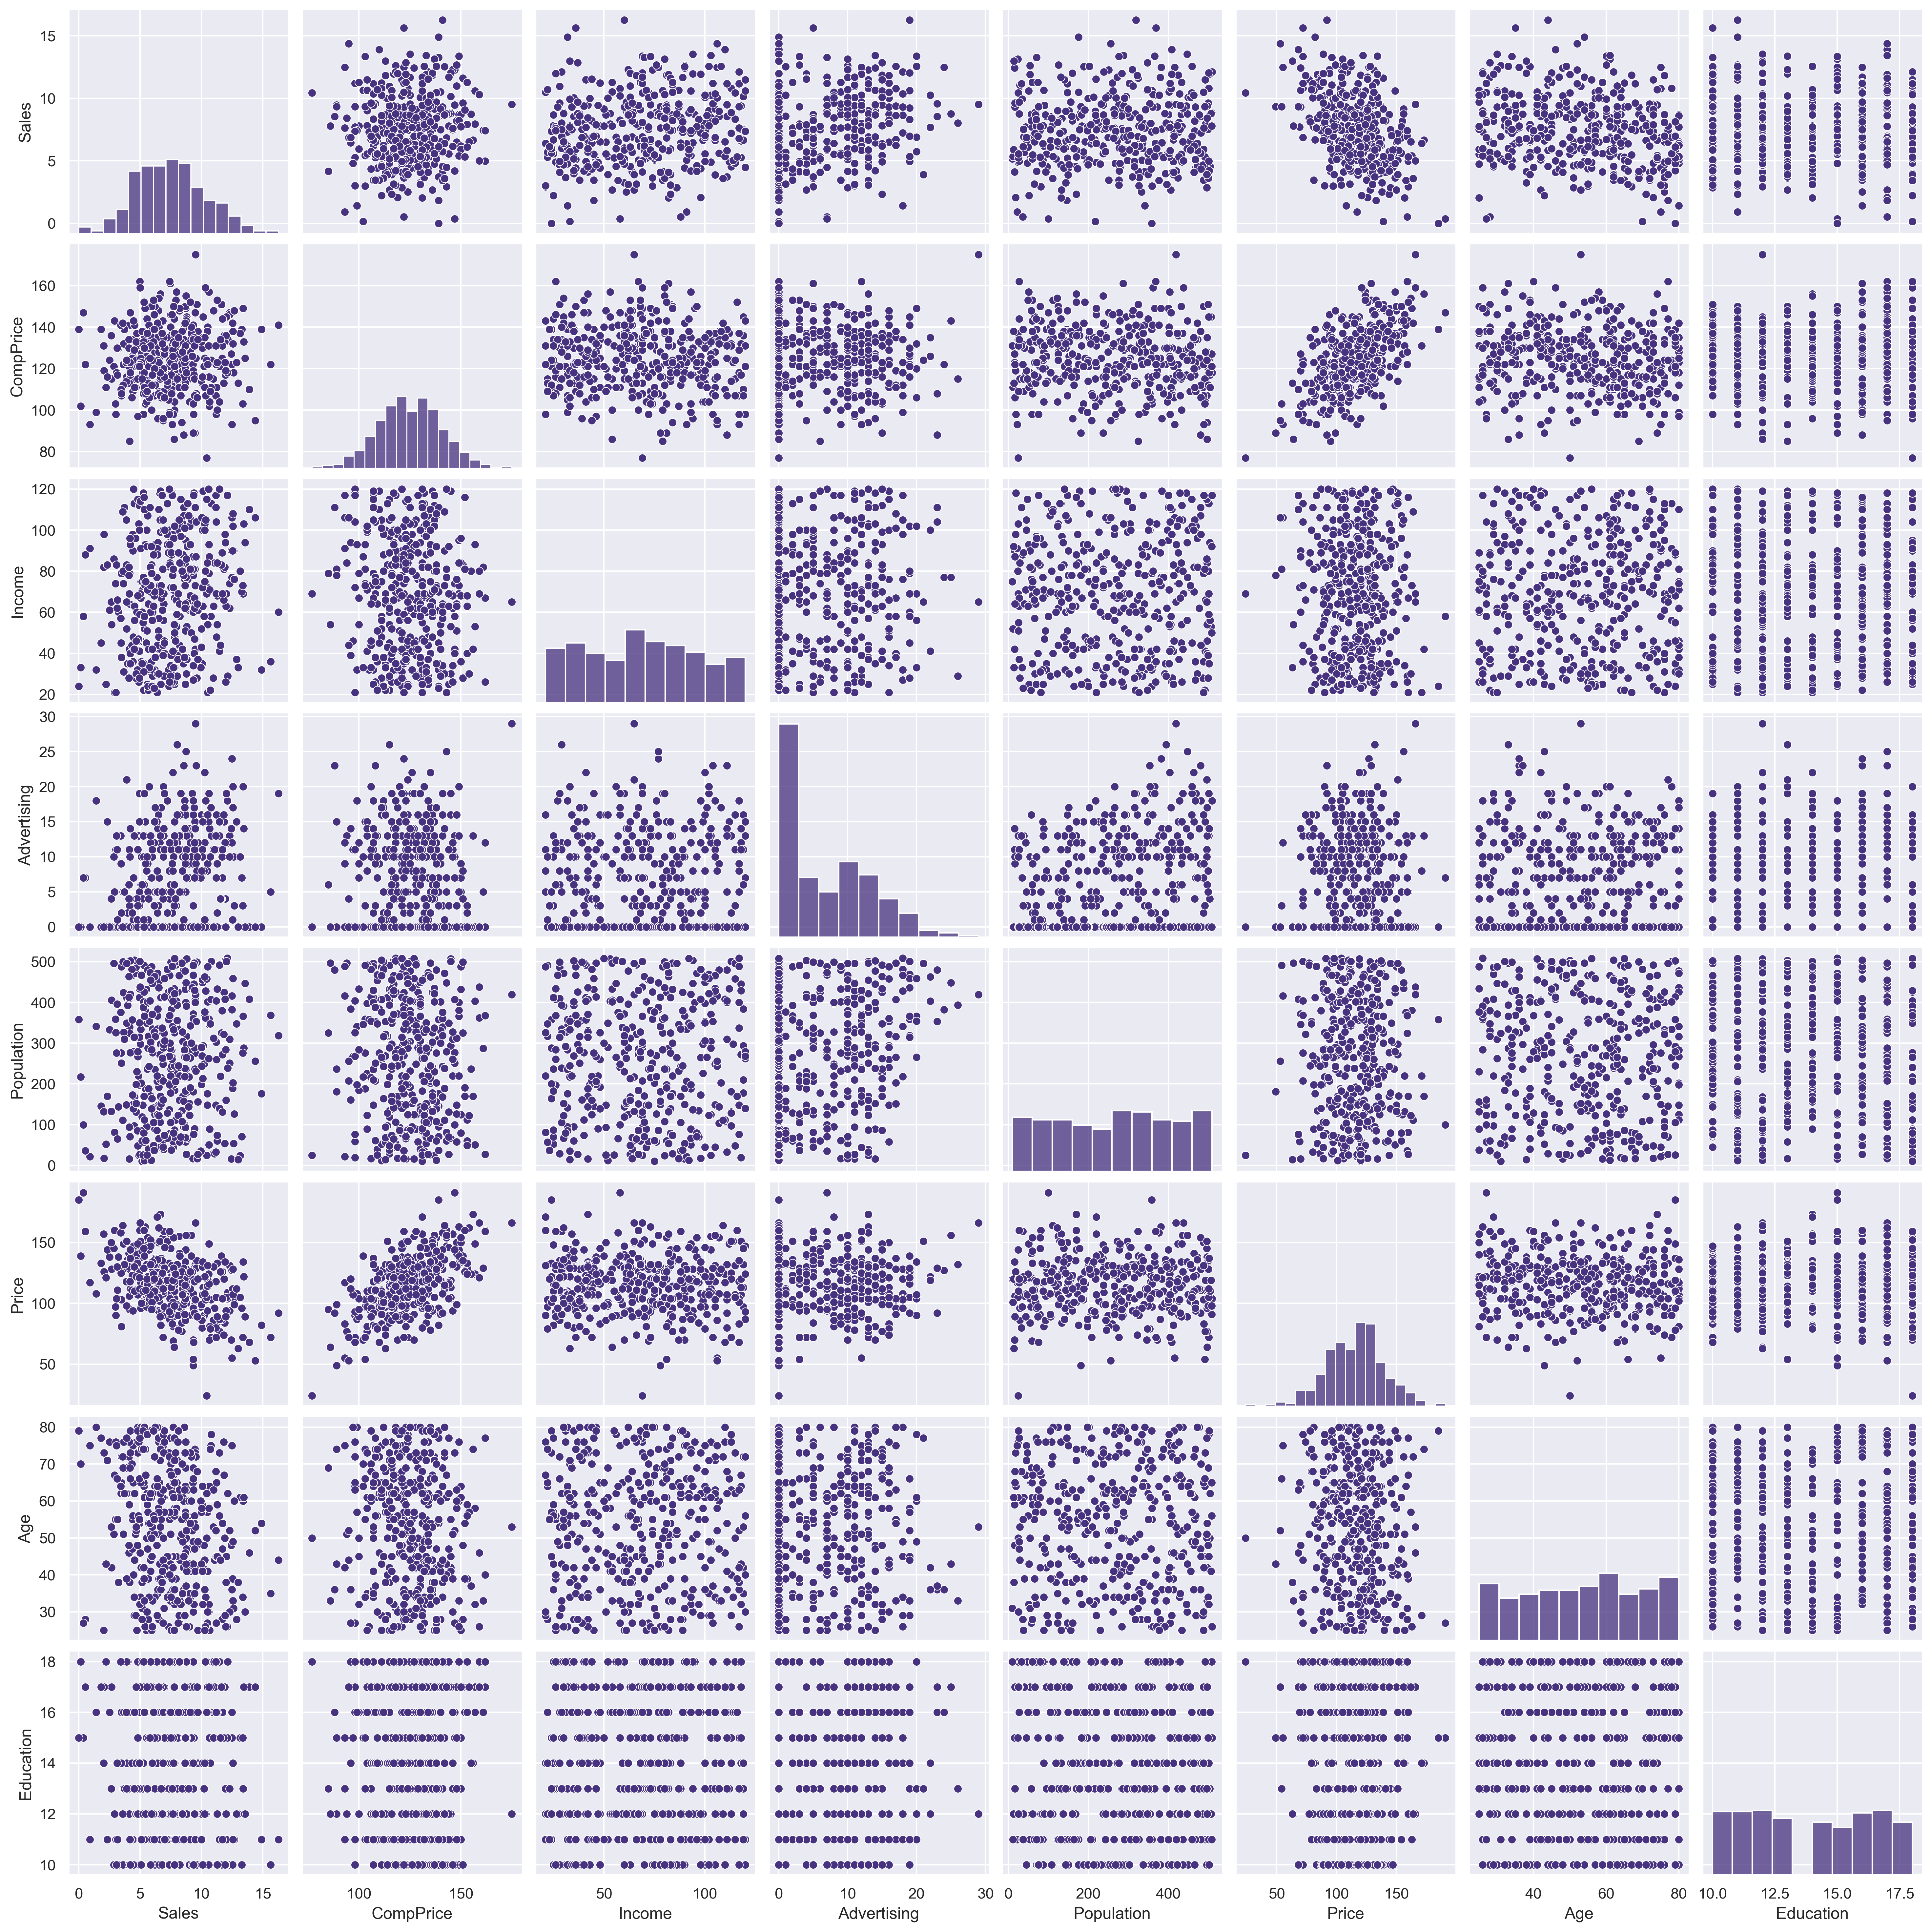

In [13]:
sns.pairplot(df)

<Axes: >

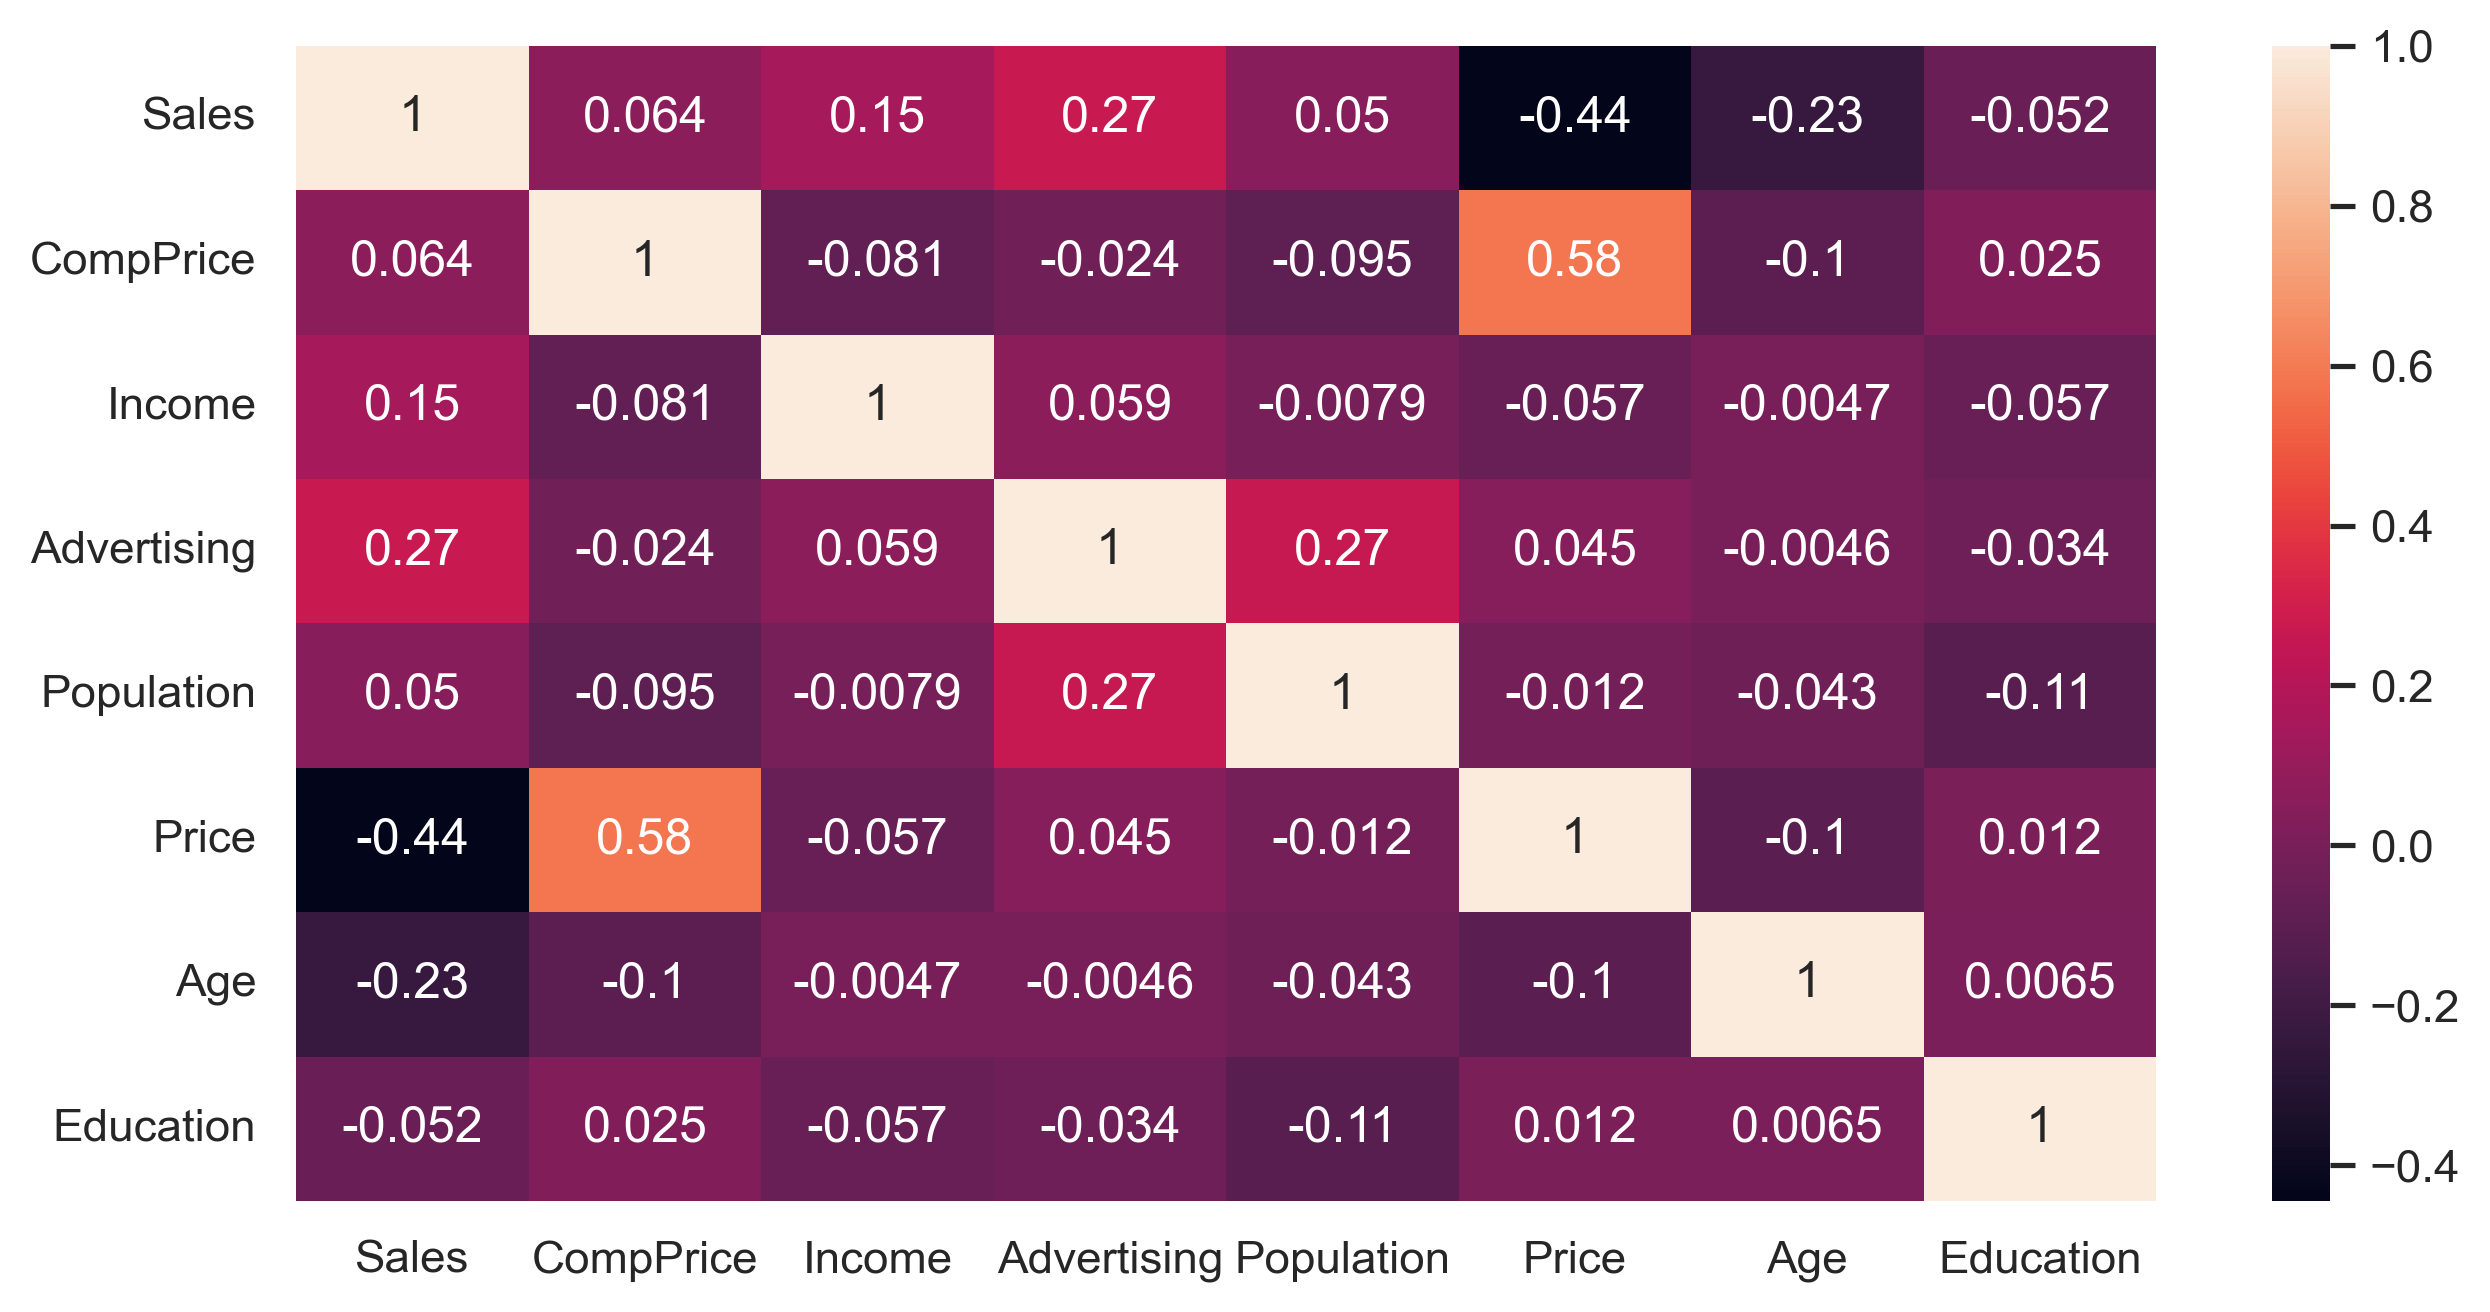

In [14]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

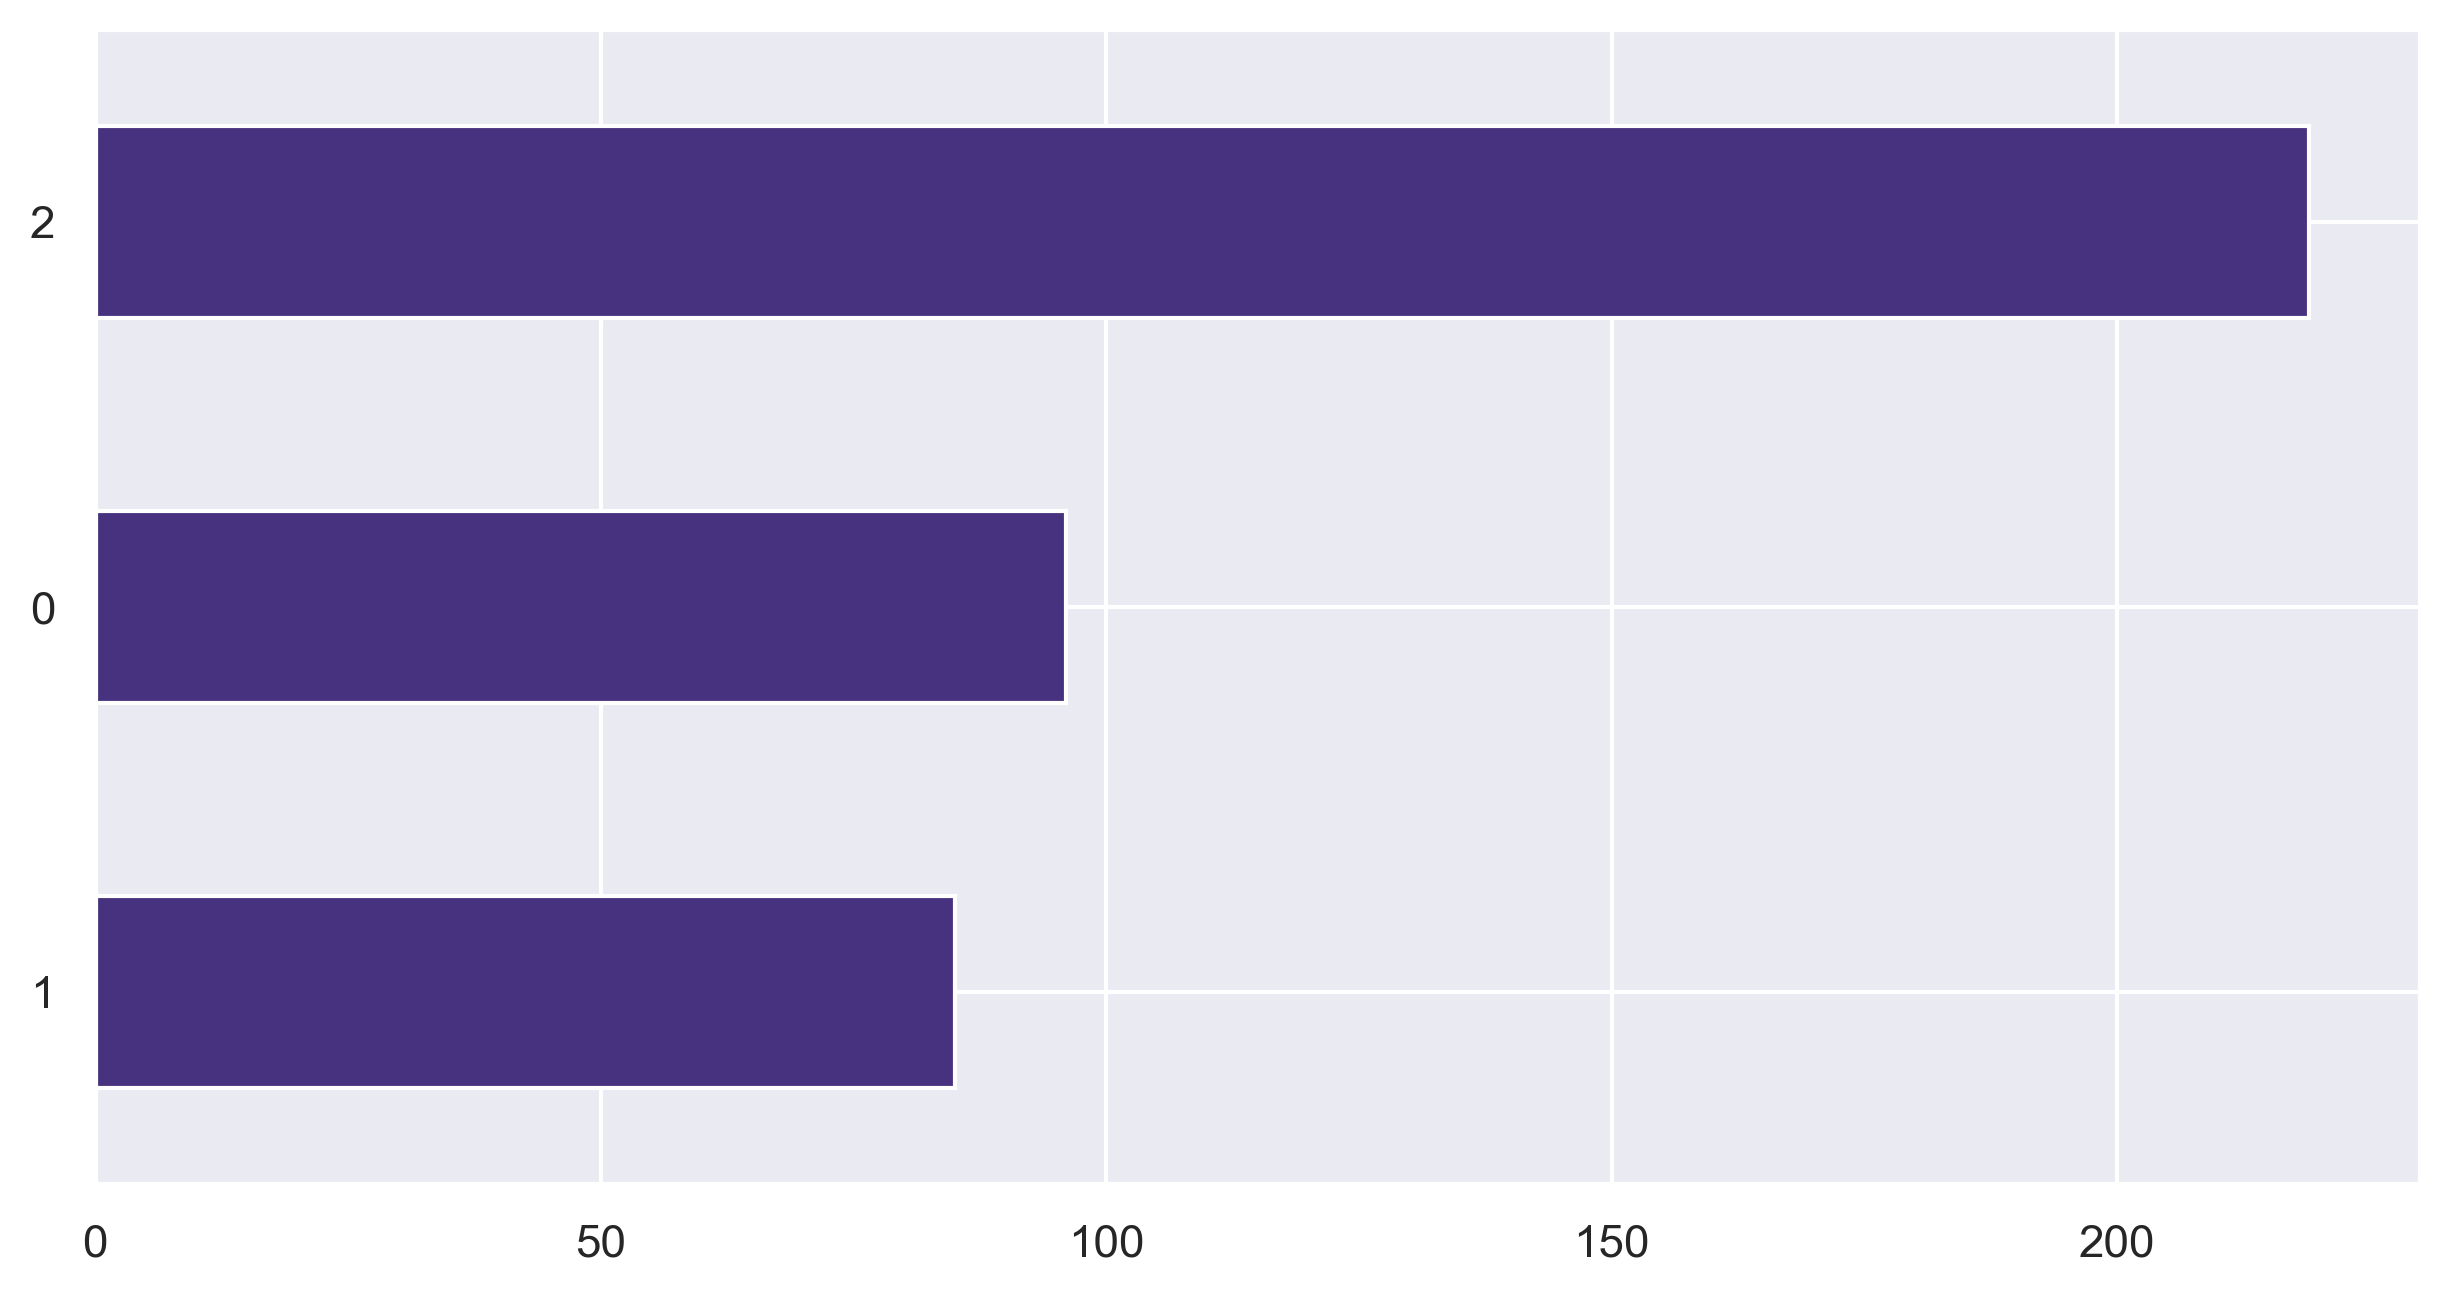

In [15]:
df['ShelveLoc'].value_counts(ascending=True).plot(kind='barh')

In [16]:
import ppscore as pps

In [17]:
feature_sel = pps.matrix(df)
feature_sel

x            y   ppscore            case  is_valid_score  \
0    Sales        Sales  1.000000  predict_itself            True   
1    Sales    CompPrice  0.000000      regression            True   
2    Sales       Income  0.000000      regression            True   
3    Sales  Advertising  0.000000      regression            True   
4    Sales   Population  0.000000      regression            True   
..     ...          ...       ...             ...             ...   
116     US    ShelveLoc  0.000017  classification            True   
117     US          Age  0.000000      regression            True   
118     US    Education  0.000000      regression            True   
119     US        Urban  0.000000  classification            True   
120     US           US  1.000000  predict_itself            True   

                  metric  baseline_score  model_score  \
0                   None        0.000000     1.000000   
1    mean absolute error       12.215000    17.223333   
2    mean absolute error       23.632500    30.317083   
3    mean absolute error        5.730000     6.332500   
4    mean absolute error      127.045000   165.681250   
..                   ...             ...          ...   
116          weighted F1        0.387407     0.387417   
117  mean absolute error       13.877500    13.956625   
118  mean absolute error        2.285000     2.304601   
119          weighted F1        0.600000     0.583031   
120                 None        0.000000     1.000000   

                        model  
0                        None  
1     DecisionTreeRegressor()  
2     DecisionTreeRegressor()  
3     DecisionTreeRegressor()  
4     DecisionTreeRegressor()  
..                        ...  
116  DecisionTreeClassifier()  
117   DecisionTreeRegressor()  
118   DecisionTreeRegressor()  
119  DecisionTreeClassifier()  
120                      None  

[121 rows x 9 columns]

In [18]:
feature_sel[feature_sel['y'] == 'Sales']

x      y   ppscore            case  is_valid_score  \
0          Sales  Sales  1.000000  predict_itself            True   
11     CompPrice  Sales  0.000000      regression            True   
22        Income  Sales  0.000000      regression            True   
33   Advertising  Sales  0.000000      regression            True   
44    Population  Sales  0.000000      regression            True   
55         Price  Sales  0.000000      regression            True   
66     ShelveLoc  Sales  0.150290      regression            True   
77           Age  Sales  0.000000      regression            True   
88     Education  Sales  0.000000      regression            True   
99         Urban  Sales  0.000000      regression            True   
110           US  Sales  0.008463      regression            True   

                  metric  baseline_score  model_score                    model  
0                   None        0.000000     1.000000                     None  
11   mean absolute error        2.262175     2.725607  DecisionTreeRegressor()  
22   mean absolute error        2.262175     2.680521  DecisionTreeRegressor()  
33   mean absolute error        2.262175     2.307301  DecisionTreeRegressor()  
44   mean absolute error        2.262175     3.174025  DecisionTreeRegressor()  
55   mean absolute error        2.262175     2.357588  DecisionTreeRegressor()  
66   mean absolute error        2.262175     1.922194  DecisionTreeRegressor()  
77   mean absolute error        2.262175     2.493357  DecisionTreeRegressor()  
88   mean absolute error        2.262175     2.319058  DecisionTreeRegressor()  
99   mean absolute error        2.262175     2.277412  DecisionTreeRegressor()  
110  mean absolute error        2.262175     2.243030  DecisionTreeRegressor()

In [19]:
# Decision Tree

In [20]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [21]:
x = df.drop(columns='Sales')
y = df['Sales']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
dtr = DecisionTreeRegressor()
dtr.fit(xtrain,ytrain)
ypred = dtr.predict(xtest)

In [25]:
ypred

array([ 3.47,  4.94, 13.39,  4.99,  8.74,  4.99, 11.48,  6.64, 10.77,
       10.98,  4.69, 10.07,  8.68,  7.32,  9.16,  9.35,  8.19, 11.99,
        6.81,  5.98,  8.41,  0.  ,  7.96,  4.34, 10.14,  7.9 ,  4.12,
        4.42,  8.77,  4.1 , 12.29, 10.49,  4.95,  5.42, 10.49,  0.16,
        5.99,  6.89,  9.09,  6.15,  4.94,  8.54,  9.64, 10.71, 10.98,
        6.18,  6.63,  7.41,  2.67,  4.97,  8.41,  8.57,  5.36, 12.29,
        9.  ,  2.05,  6.56, 12.29, 11.96,  6.67,  7.8 , 10.98, 11.18,
        4.68,  7.95,  8.77,  8.21,  6.43,  6.8 , 10.49,  7.41,  8.77,
       11.18,  2.05, 11.18,  9.32,  6.92,  7.8 ,  6.62,  7.41])

In [26]:
dtr.score(xtrain,ytrain),dtr.score(xtest,ytest)

(1.0, 0.4278312808433198)

In [27]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [28]:
params = {
    'criterion' : ['squared_error','absolute_error'],
    'splitter' : ['best','random'],
    'max_depth' : [3,5,6,9,7]
}

In [29]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=params)

In [30]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 5, 6, 9, 7],
                         'splitter': ['best', 'random']})

In [31]:
grid.best_params_

{'criterion': 'squared_error', 'max_depth': 5, 'splitter': 'random'}

In [32]:
dtr = DecisionTreeRegressor(criterion='absolute_error',max_depth=5,splitter='random')
dtr.fit(xtrain,ytrain)
yp = dtr.predict(xtest)

In [33]:
dtr.score(xtrain,ytrain),dtr.score(xtest,ytest)

(0.5547825993322768, 0.41834471893755565)

In [34]:
x.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [35]:
dtr.feature_importances_

array([0.02172384, 0.02727202, 0.17234508, 0.04430726, 0.22192701,
       0.40001563, 0.01410487, 0.03875908, 0.02813159, 0.03141361])

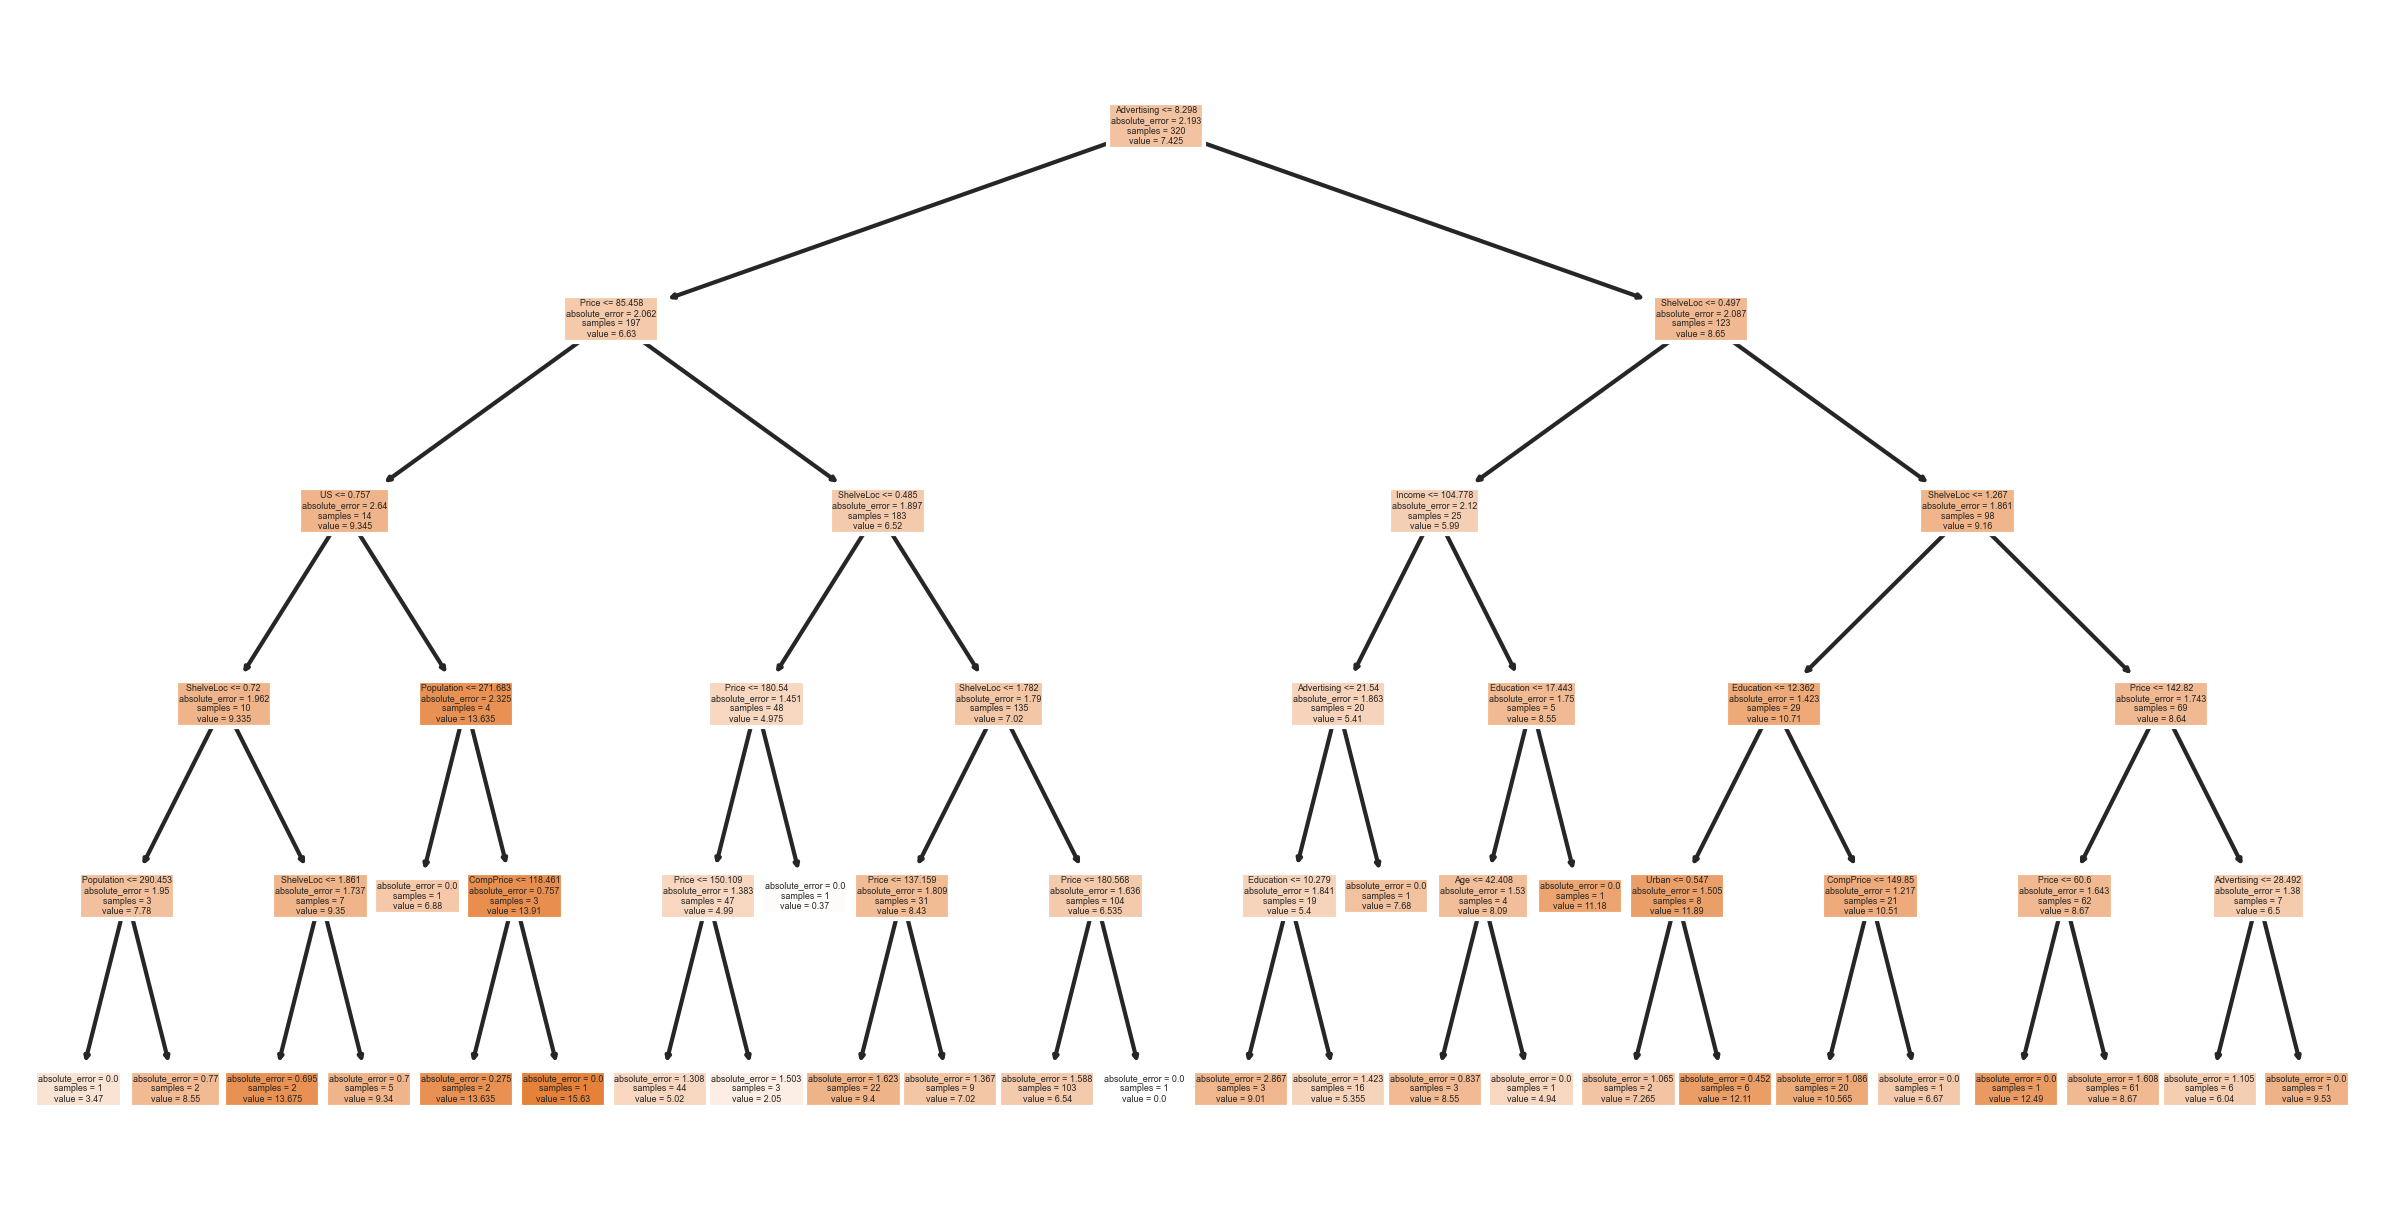

In [36]:
tree.plot_tree(dtr,feature_names=x.columns,filled=True)
plt.show()

2.Fraud_Check Dataset

fc = pd.read_csv('Fraud_check.csv')
fc

In [38]:
fc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [39]:
fc.drop(columns='City.Population',inplace=True)

In [41]:
fc.head()

Undergrad Marital.Status  Taxable.Income  Work.Experience Urban
0        NO         Single           68833               10   YES
1       YES       Divorced           33700               18   YES
2        NO        Married           36925               30   YES
3       YES         Single           50190               15   YES
4        NO        Married           81002               28    NO

We need to add a target column of Risky and Good.As per the problem statement.

In [51]:
y1 = np.empty(600, dtype=object)

for i in range(len(fc['Taxable.Income'])):
    if fc['Taxable.Income'][i] <= 30000:
        y1[i] = 'Risky'
    else:
        y1[i] = 'Good'


In [52]:
y1

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [53]:
t1 = pd.DataFrame(y1,columns=['Target'])
t1

Target
0     Good
1     Good
2     Good
3     Good
4     Good
..     ...
595   Good
596   Good
597   Good
598   Good
599   Good

[600 rows x 1 columns]

In [55]:
df = pd.concat([fc,t1],axis=1)
df.head()

Undergrad Marital.Status  Taxable.Income  Work.Experience Urban Target
0        NO         Single           68833               10   YES   Good
1       YES       Divorced           33700               18   YES   Good
2        NO        Married           36925               30   YES   Good
3       YES         Single           50190               15   YES   Good
4        NO        Married           81002               28    NO   Good

In [56]:
df.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
Work.Experience    0
Urban              0
Target             0
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   Target           600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.3+ KB


In [59]:
df['Target'].value_counts()

Good     476
Risky    124
Name: Target, dtype: int64

In [60]:
df.corr()

Taxable.Income  Work.Experience
Taxable.Income         1.000000        -0.001818
Work.Experience       -0.001818         1.000000

In [61]:
df.groupby(['Undergrad','Marital.Status','Urban']).count()

Taxable.Income  Work.Experience  Target
Undergrad Marital.Status Urban                                         
NO        Divorced       NO                 53               53      53
                         YES                44               44      44
          Married        NO                 44               44      44
                         YES                47               47      47
          Single         NO                 46               46      46
                         YES                54               54      54
YES       Divorced       NO                 50               50      50
                         YES                42               42      42
          Married        NO                 50               50      50
                         YES                53               53      53
          Single         NO                 55               55      55
                         YES                62               62      62

In [63]:
#Label Encoding
from sklearn import preprocessing

In [64]:
lb_fc = preprocessing.LabelEncoder()
df['Undergrad'] = lb_fc.fit_transform(df['Undergrad'])
df['Marital.Status'] = lb_fc.fit_transform(df['Marital.Status'])
df['Urban'] = lb_fc.fit_transform(df['Urban'])
df['Target'] = lb_fc.fit_transform(df['Target'])

In [65]:
df.head()

Undergrad  Marital.Status  Taxable.Income  Work.Experience  Urban  Target
0          0               2           68833               10      1       0
1          1               0           33700               18      1       0
2          0               1           36925               30      1       0
3          1               2           50190               15      1       0
4          0               1           81002               28      0       0

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   Work.Experience  600 non-null    int64
 4   Urban            600 non-null    int32
 5   Target           600 non-null    int32
dtypes: int32(4), int64(2)
memory usage: 18.9 KB


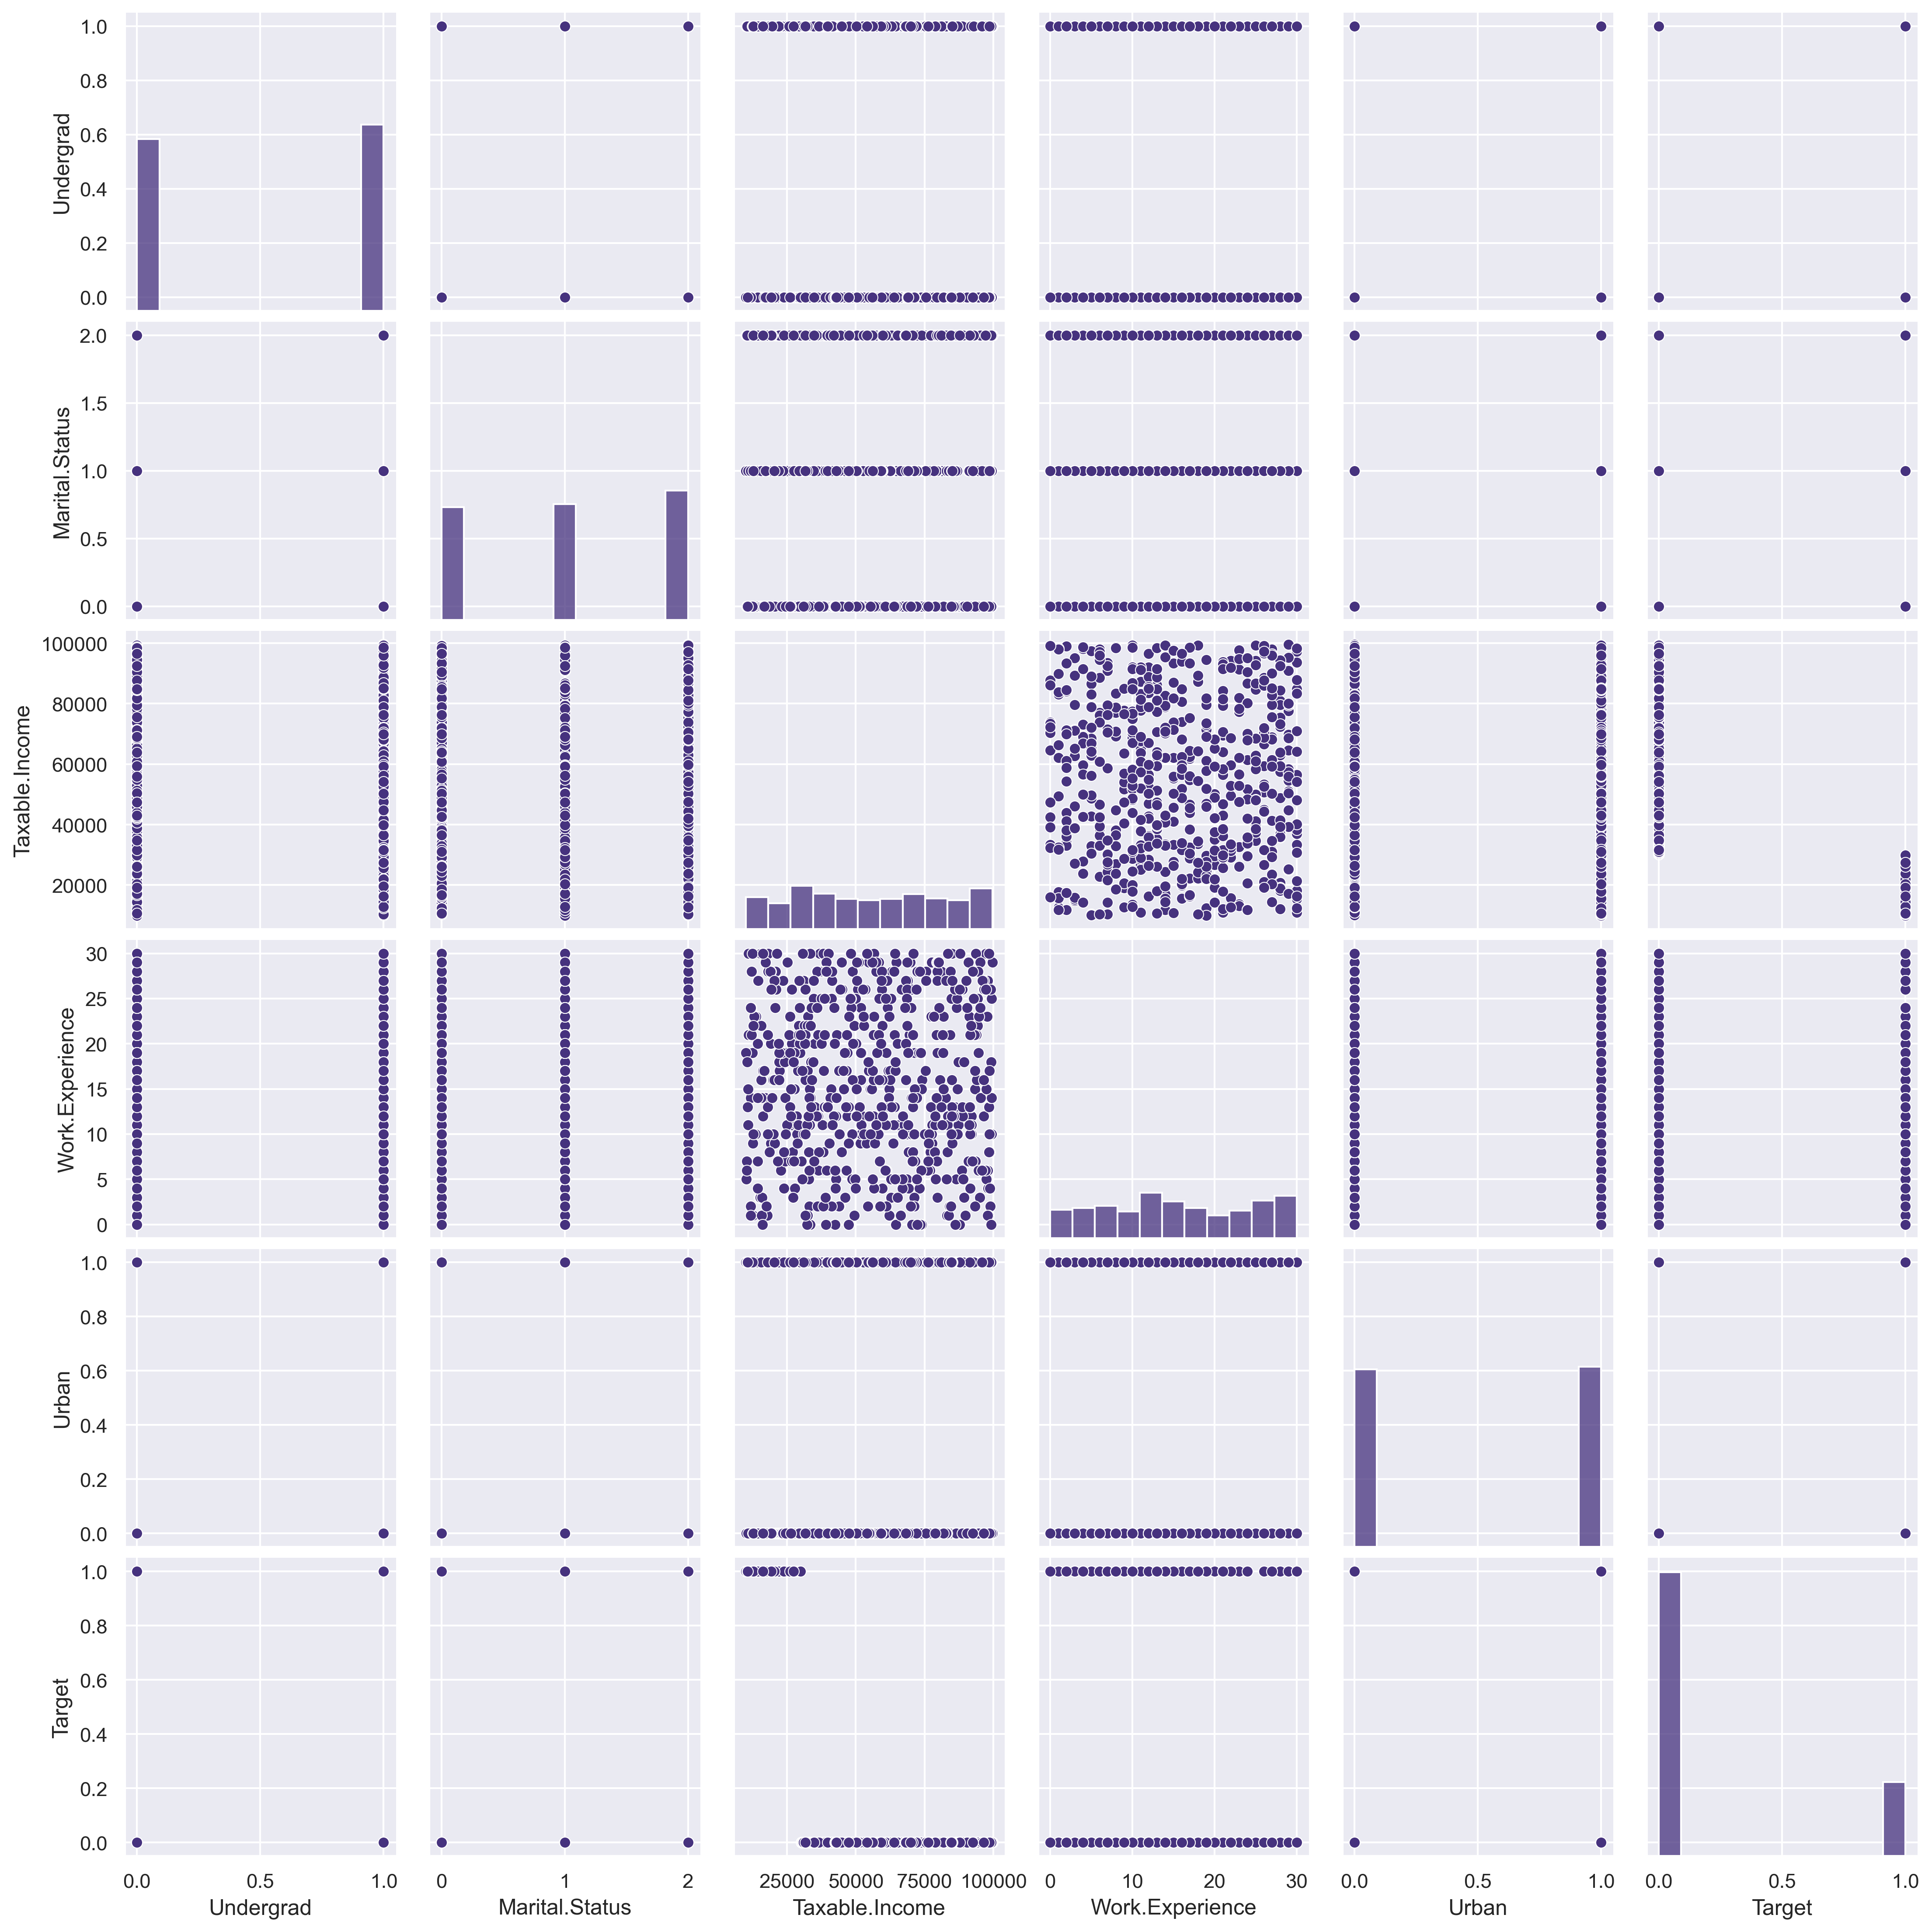

In [67]:
sns.pairplot(df)

<Axes: >

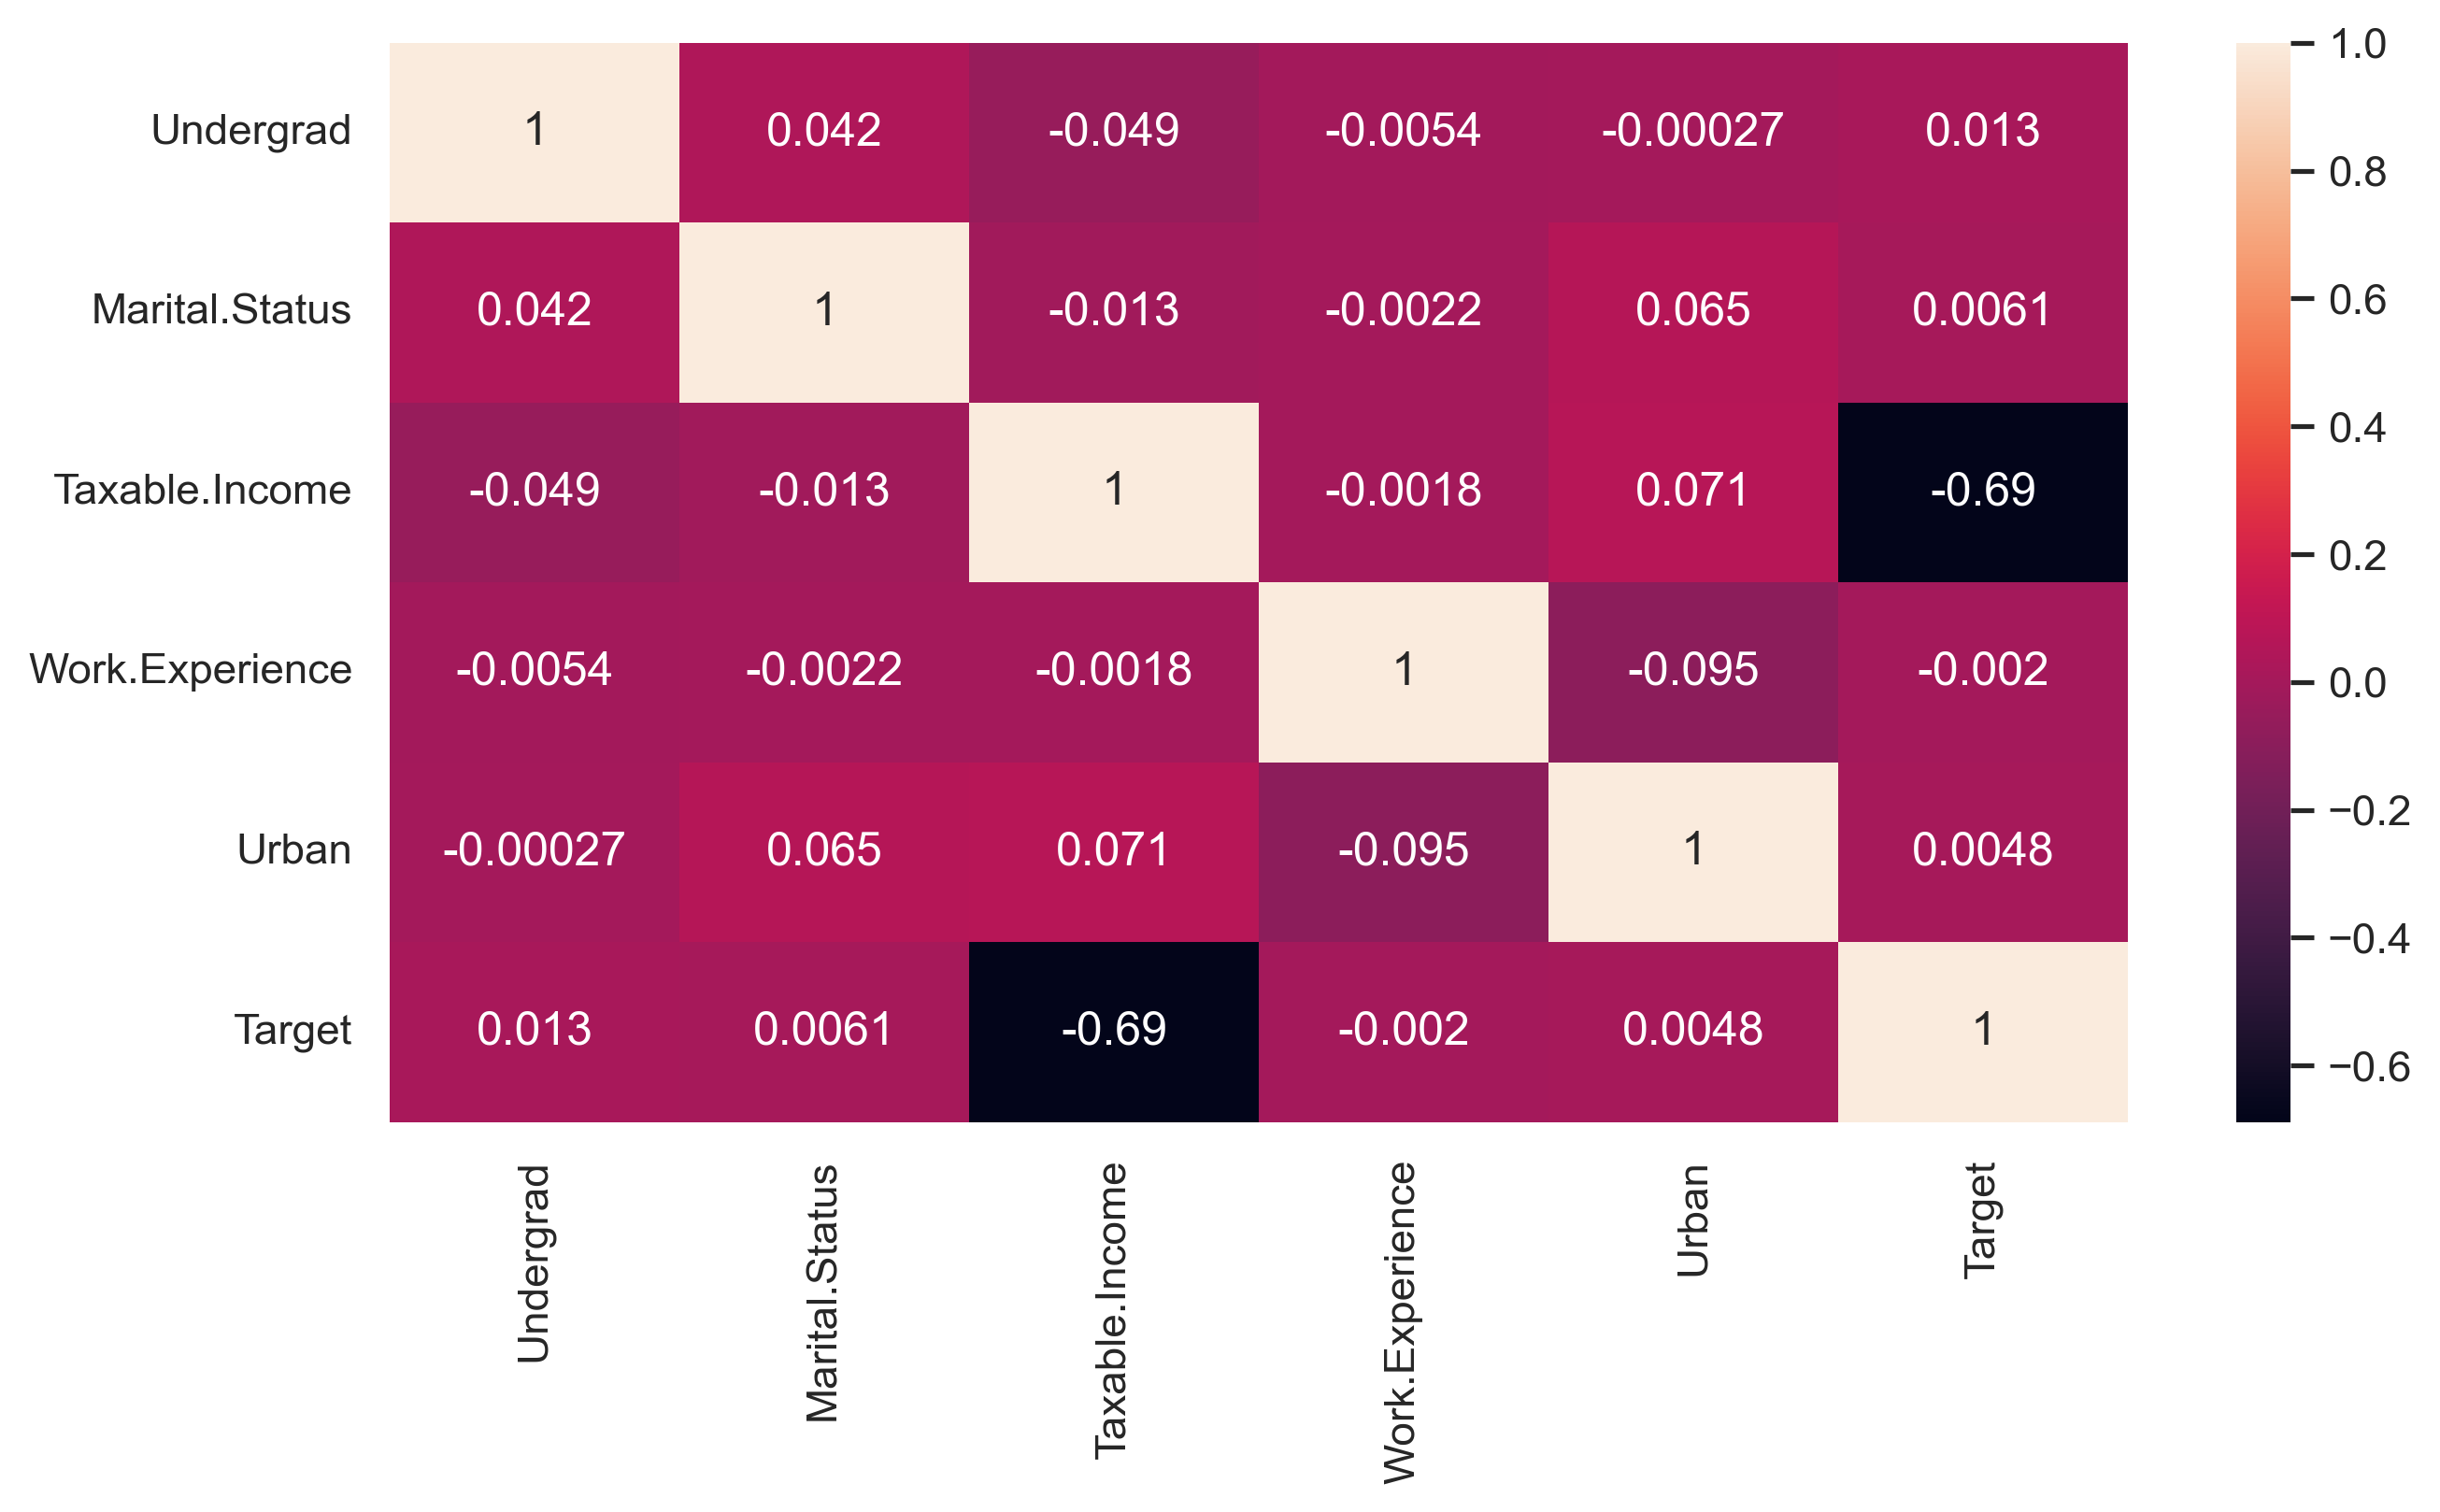

In [68]:
sns.heatmap(df.corr(),annot=True)

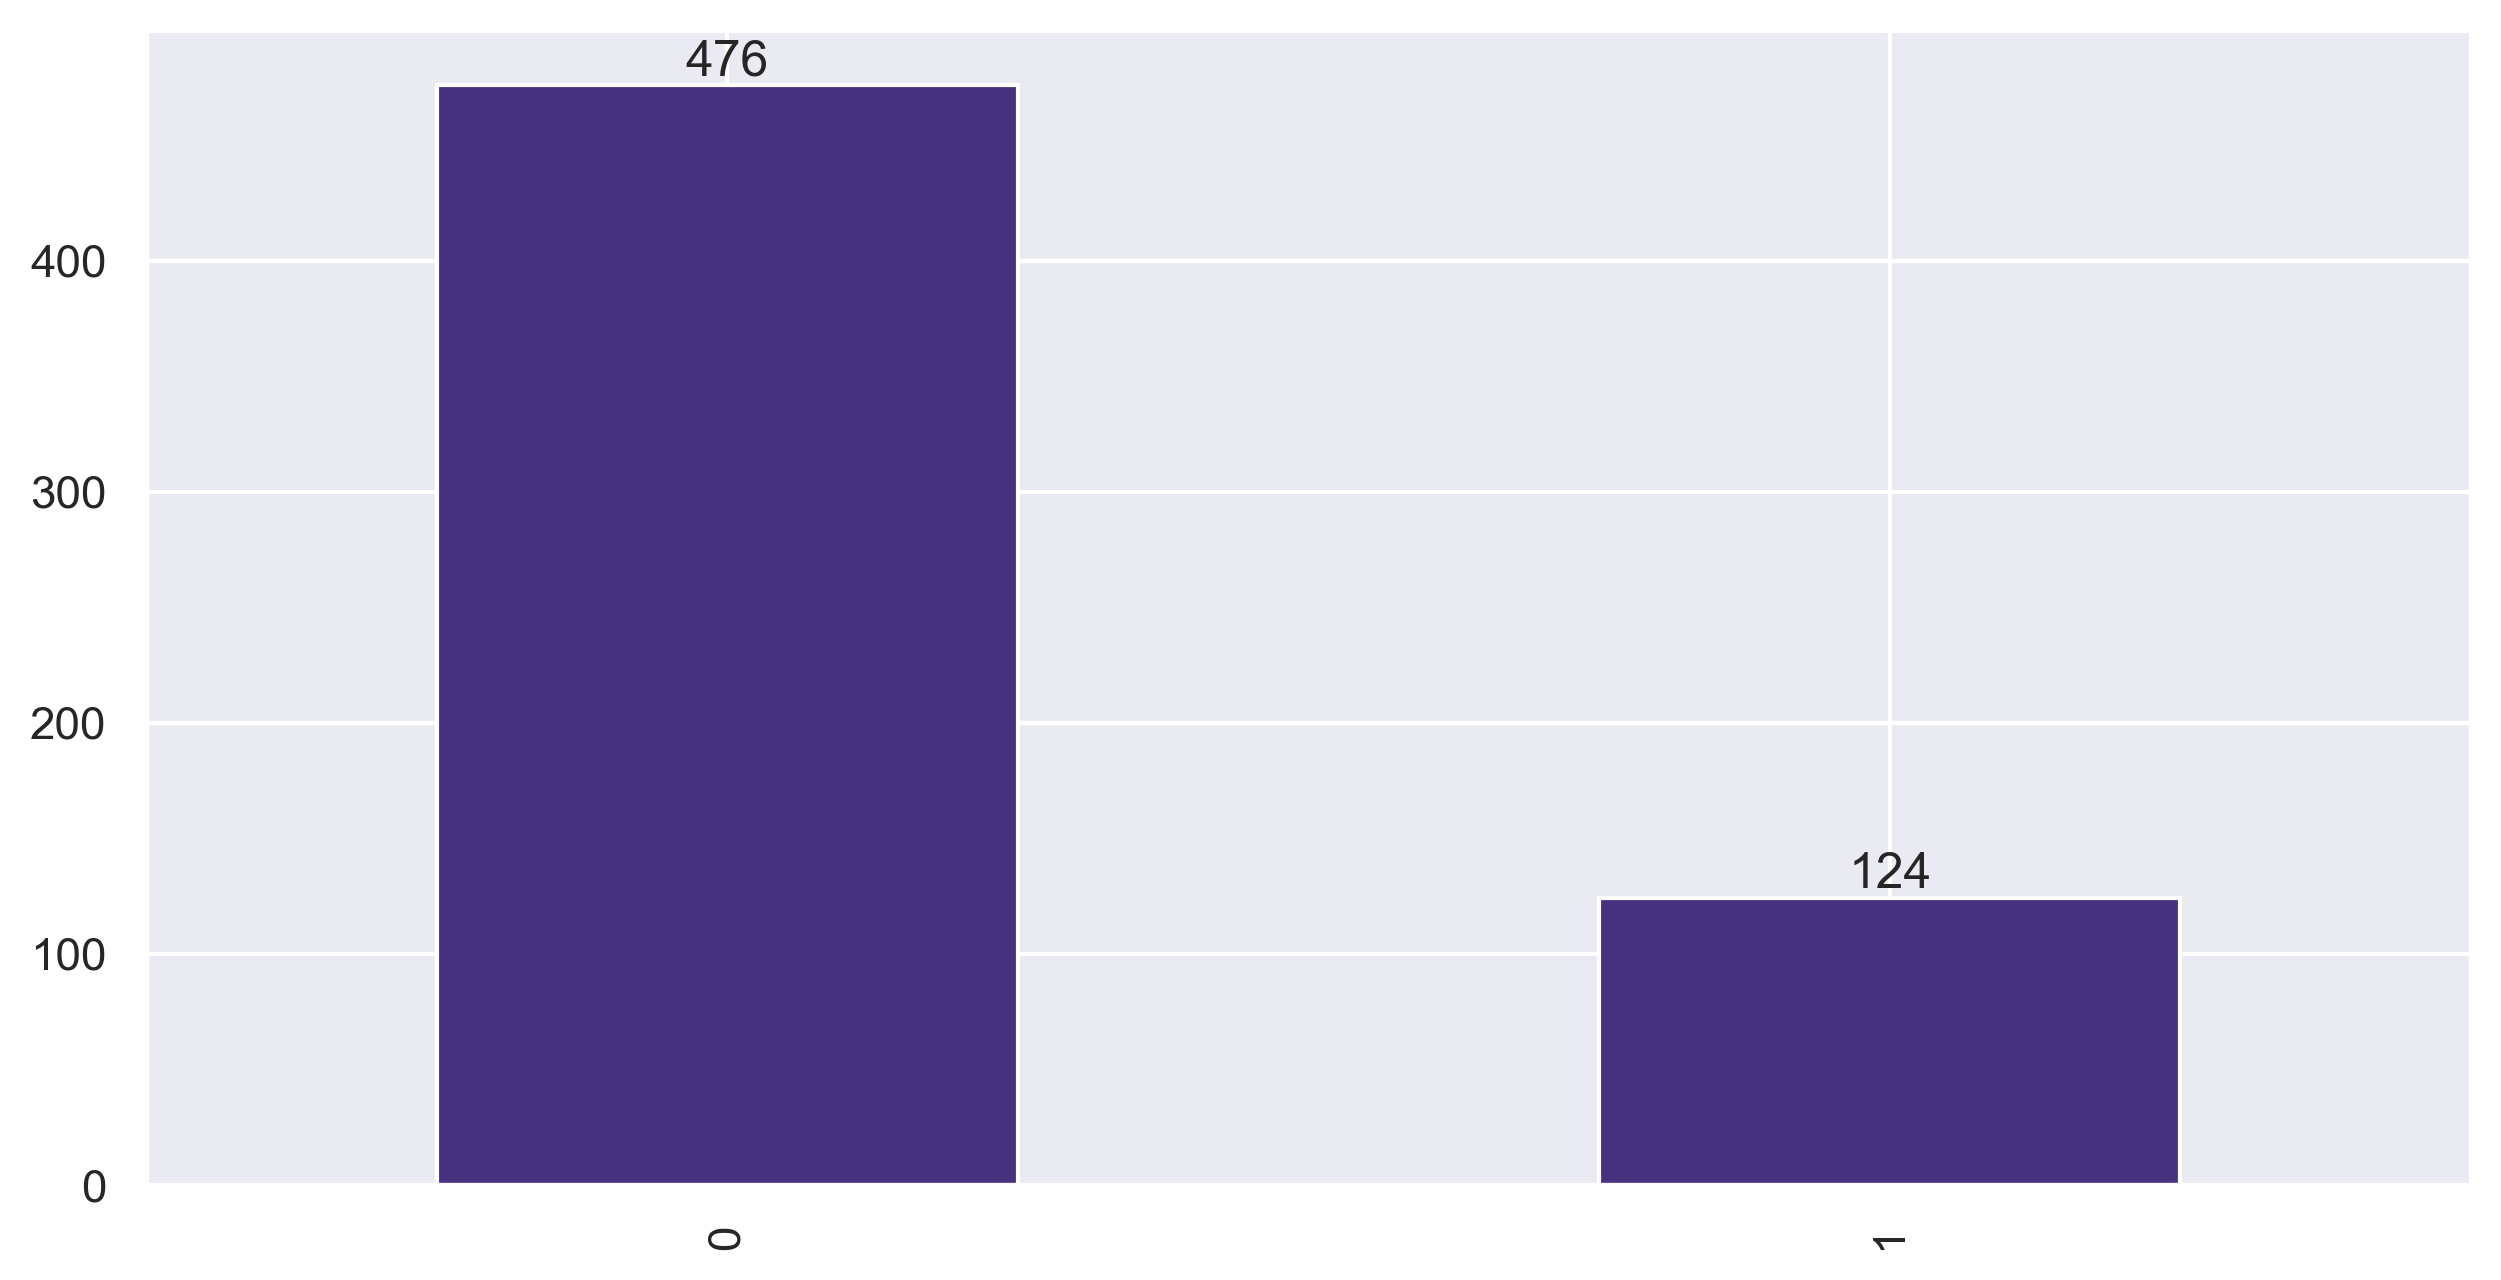

In [72]:
barplot = df['Target'].value_counts().plot(kind = 'bar')

for i in barplot.containers:
    barplot.bar_label(i)

In [73]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [76]:
x = df.iloc[:,:-1]
y = df['Target']

In [79]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [80]:
dtc = DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
ypred = dtc.predict(xtest)

In [81]:
ypred

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [82]:
dtc.score(xtrain,ytrain),dtc.score(xtest,ytest)

(1.0, 1.0)

In [83]:
from sklearn.metrics import classification_report,confusion_matrix

<Axes: >

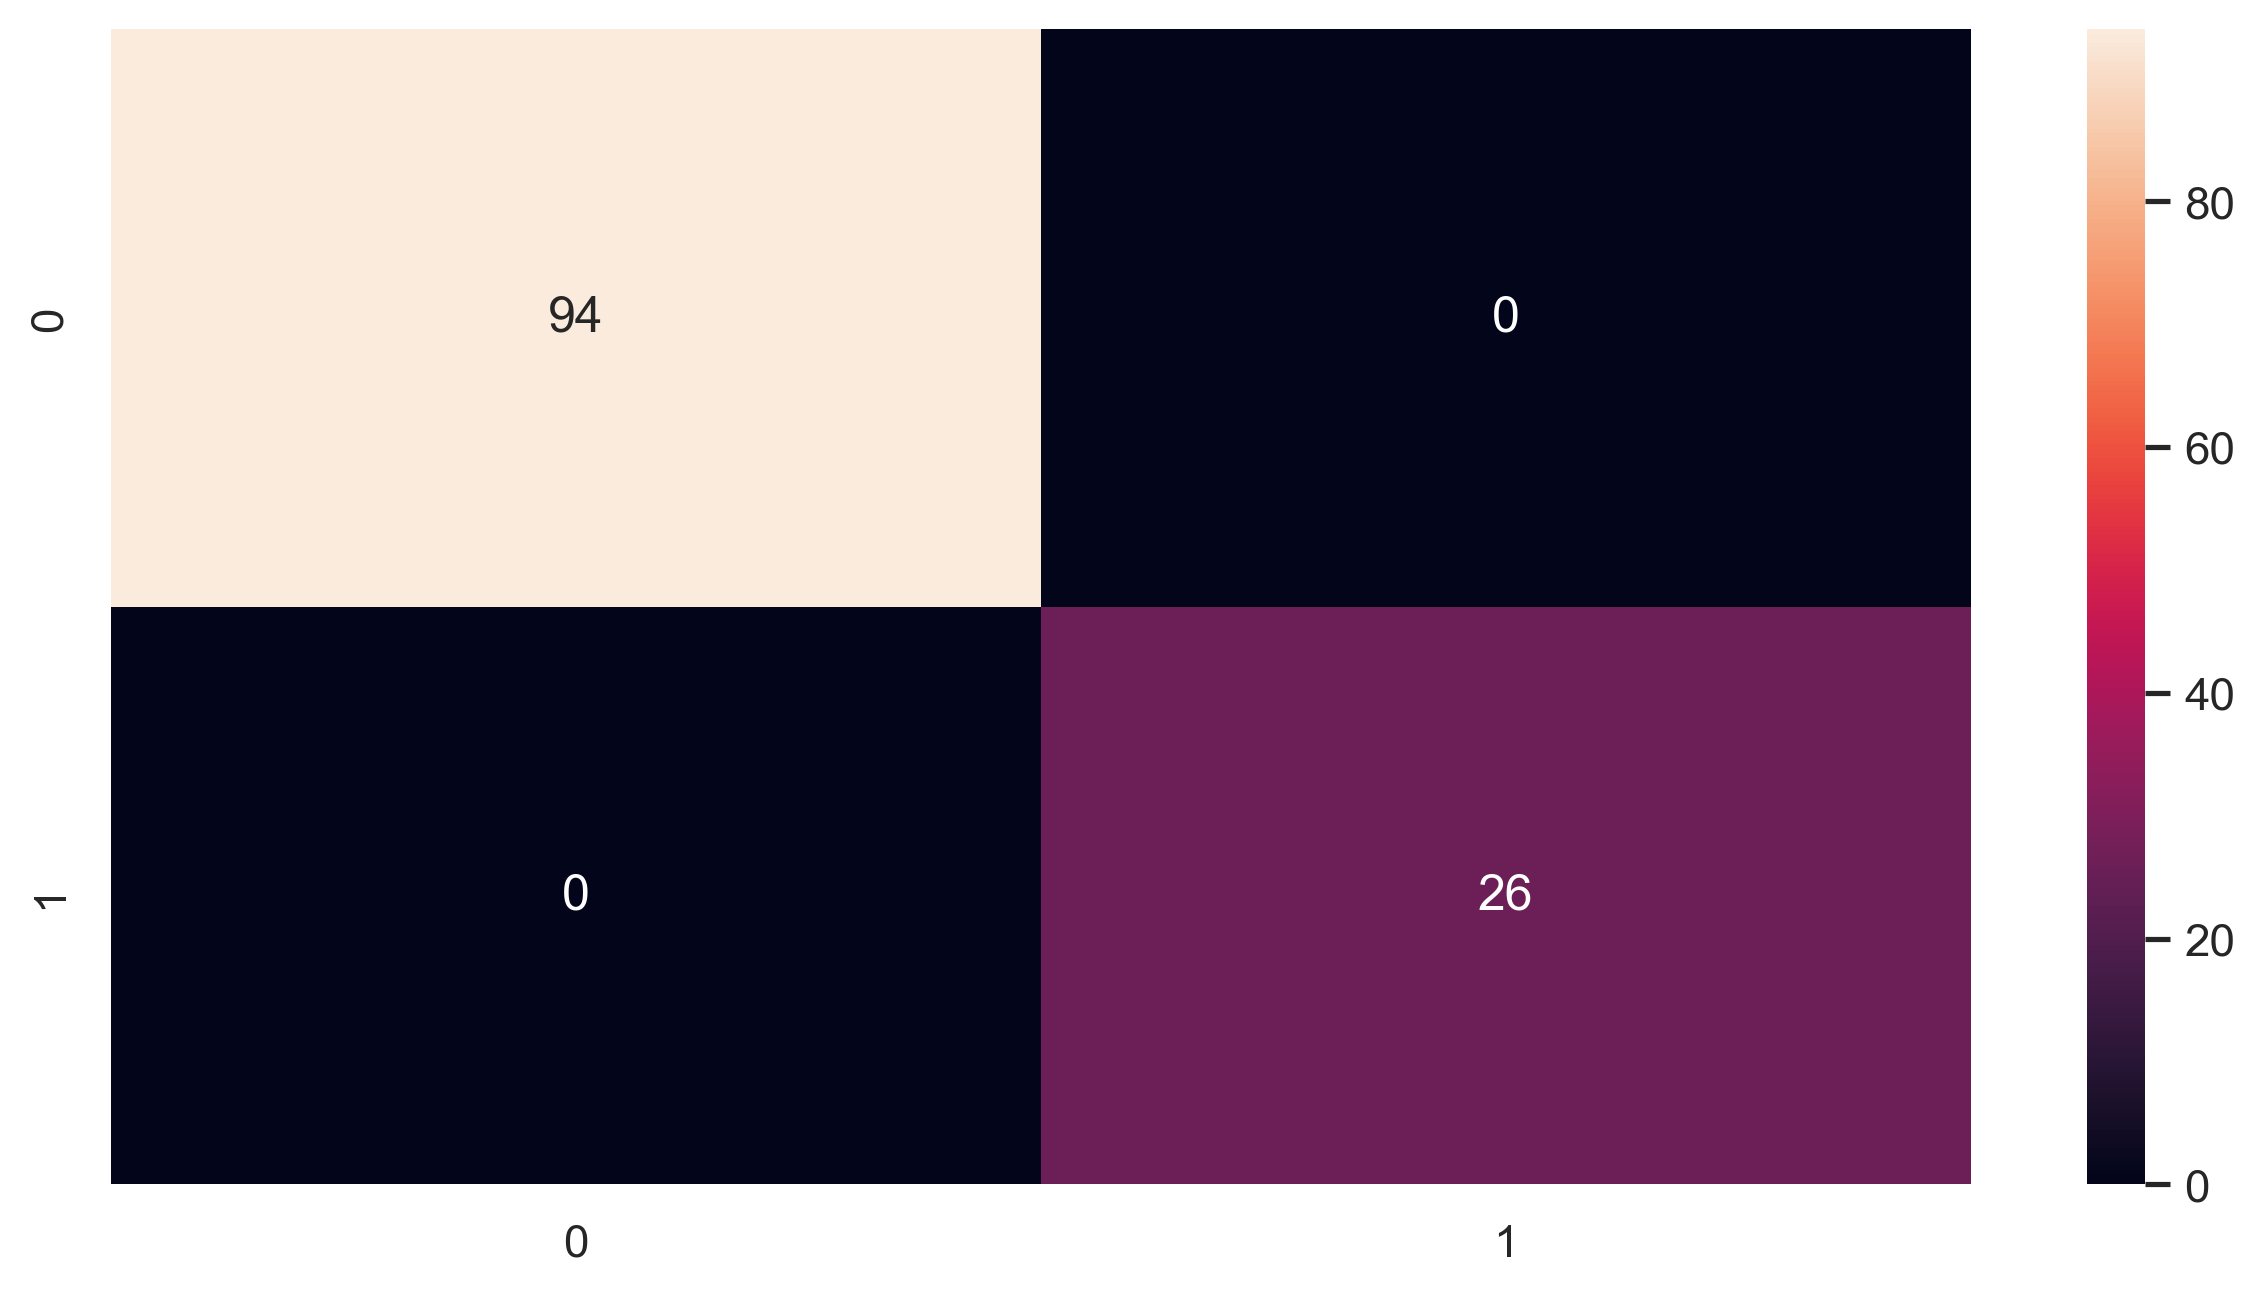

In [85]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True)

In [86]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

